In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/Ev Sales.xlsx'
data = pd.read_excel(file_path)

In [ ]:
print(data.head())

        YEAR  2 W   3 W  4 W  BUS  TOTAL
0 2017-04-01   96  4748  198    0   5042
1 2017-05-01   91  6720  215    2   7028
2 2017-06-01  137  7178  149    1   7465
3 2017-07-01  116  8775  120    0   9011
4 2017-08-01   99  8905  137    0   9141


In [ ]:
data['YEAR'] = pd.to_datetime(data['YEAR'])
data['Year'] = data['YEAR'].dt.year

In [ ]:
data['PERIOD'] = 'Post-COVID'
data.loc[(data['YEAR'] >= '2017-04-01') & (data['YEAR'] < '2020-04-01'), 'PERIOD'] = 'Pre-COVID'
data.loc[(data['YEAR'] >= '2020-04-01') & (data['YEAR'] < '2021-04-01'), 'PERIOD'] = 'COVID'

In [ ]:
vehicle_sales_summary = data[['2 W', '3 W', '4 W', 'BUS']].sum().reset_index()
vehicle_sales_summary.columns = ['Vehicle_Type', 'Total_Sales']
print(vehicle_sales_summary)

  Vehicle_Type  Total_Sales
0          2 W      1253466
1          3 W      1099000
2          4 W        94170
3          BUS         6091


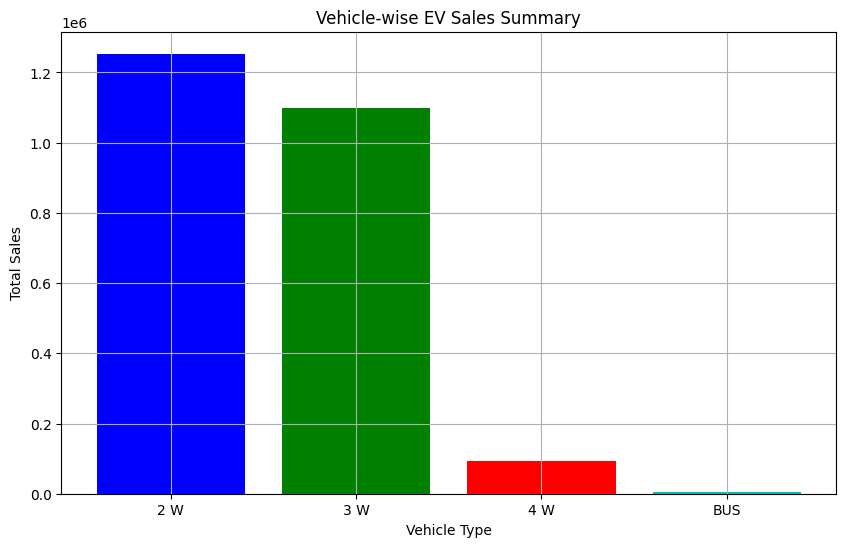

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(vehicle_sales_summary['Vehicle_Type'], vehicle_sales_summary['Total_Sales'], color=['b', 'g', 'r', 'c'])
plt.title('Vehicle-wise EV Sales Summary')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [ ]:
data['PERIOD'] = 'Post-COVID'
data.loc[(data['YEAR'] >= '2017-04-01') & (data['YEAR'] < '2020-04-01'), 'PERIOD'] = 'Pre-COVID'
data.loc[(data['YEAR'] >= '2020-04-01') & (data['YEAR'] < '2021-07-01'), 'PERIOD'] = 'COVID'

In [ ]:
period_summary = data.groupby('PERIOD')[['2 W', '3 W', '4 W', 'BUS', 'TOTAL']].sum().reset_index()
print(period_summary)

       PERIOD      2 W     3 W    4 W   BUS    TOTAL
0       COVID    56406  106229   7584   684   170903
1  Post-COVID  1140221  641719  79433  3585  1864958
2   Pre-COVID    56839  351052   7153  1822   416866


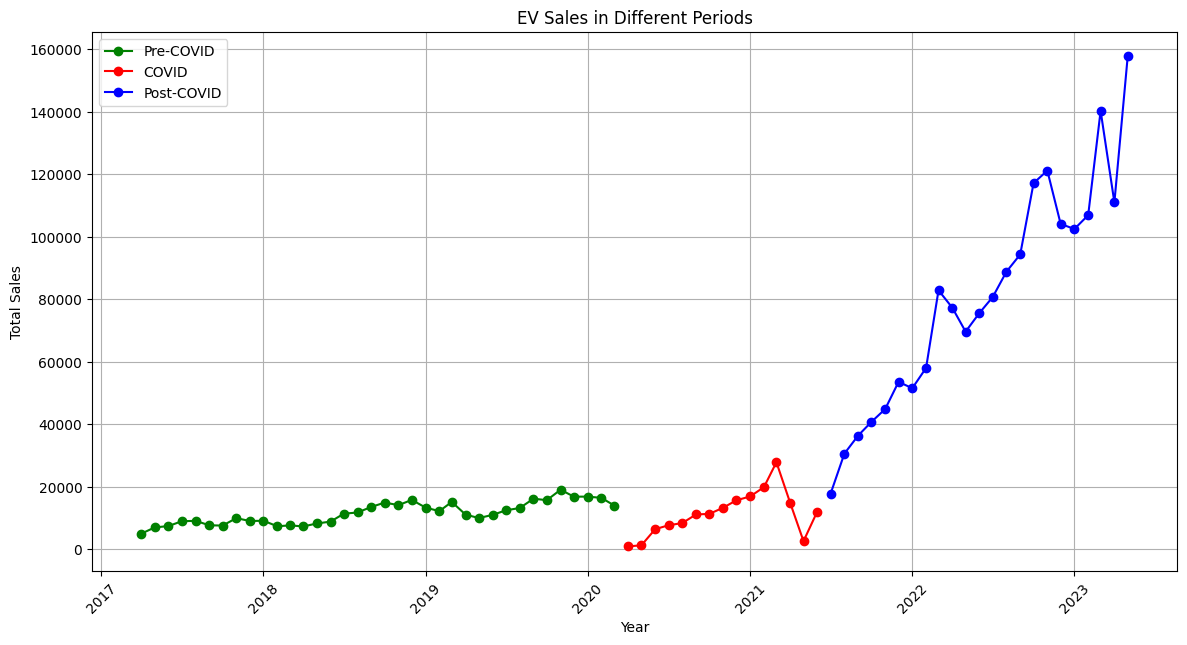

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data[data['PERIOD'] == 'Pre-COVID']['YEAR'], data[data['PERIOD'] == 'Pre-COVID']['TOTAL'], marker='o', linestyle='-', color='g', label='Pre-COVID')
plt.plot(data[data['PERIOD'] == 'COVID']['YEAR'], data[data['PERIOD'] == 'COVID']['TOTAL'], marker='o', linestyle='-', color='r', label='COVID')
plt.plot(data[data['PERIOD'] == 'Post-COVID']['YEAR'], data[data['PERIOD'] == 'Post-COVID']['TOTAL'], marker='o', linestyle='-', color='b', label='Post-COVID')
plt.title('EV Sales in Different Periods')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
period_vehicle_summary = data.groupby('PERIOD')[['2 W', '3 W', '4 W', 'BUS']].sum().reset_index()
print(period_vehicle_summary)

       PERIOD      2 W     3 W    4 W   BUS
0       COVID    56406  106229   7584   684
1  Post-COVID  1140221  641719  79433  3585
2   Pre-COVID    56839  351052   7153  1822


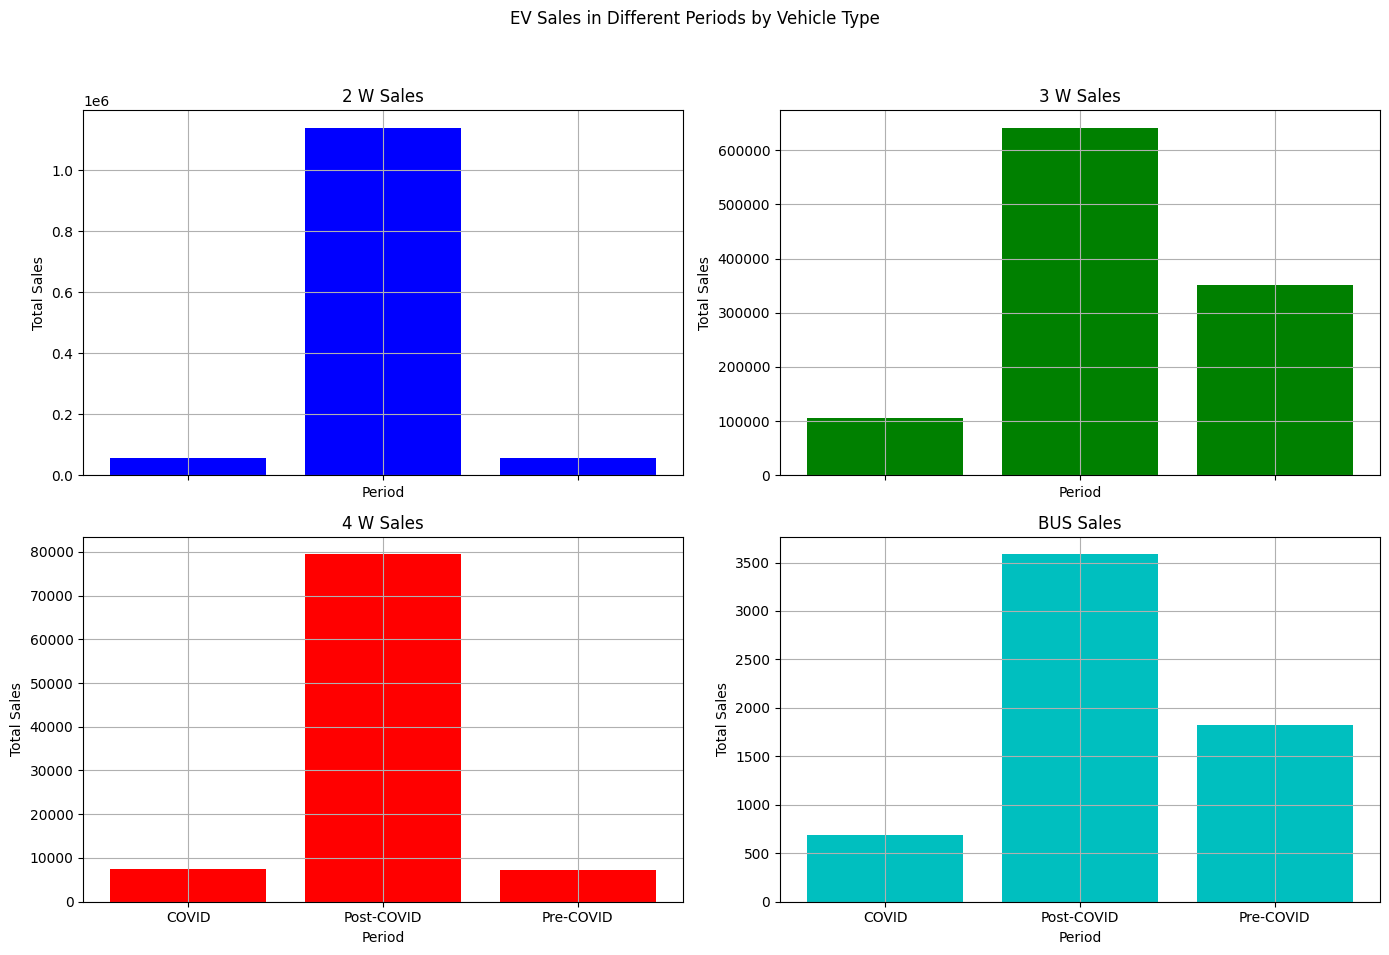

In [ ]:
periods = ['Pre-COVID', 'COVID', 'Post-COVID']
vehicle_types = ['2 W', '3 W', '4 W', 'BUS']
colors = ['b', 'g', 'r', 'c']

fig, ax = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
fig.suptitle('EV Sales in Different Periods by Vehicle Type')

for i, vehicle in enumerate(vehicle_types):
    row = i // 2
    col = i % 2
    ax[row, col].bar(period_vehicle_summary['PERIOD'], period_vehicle_summary[vehicle], color=colors[i])
    ax[row, col].set_title(f'{vehicle} Sales')
    ax[row, col].set_xlabel('Period')
    ax[row, col].set_ylabel('Total Sales')
    ax[row, col].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()